In [78]:
import numpy as np
import matplotlib.pyplot as plt

https://fr.wikipedia.org/wiki/K-moyennes

In [79]:
# 2D Points Dataset
x = np.array([1,0,2.5,6,1,8,3,0,3,9,8,4,5])
y = np.array([1,4,7,2,3,4,7,2,6,1,3,6,7])

n = x.shape[0] #Nb of points
k = 3 # Nb of clusters    k<n

middles = np.random.randint(low=0,high=20,size=(k,2))/2   #Generate random points 

points = np.array([x,y])
points = points.T # n 2D points  

l = points.shape[1] #Len of vector : 2 (Point)

In [80]:
def scatter_plot(points,middles,belongs):
    
    plt.scatter(points[:,0],points[:,1],color='blue')
    plt.scatter(middles[:,0],middles[:,1],color='red')
    
    for i in range(0,n): 
        plt.text(points[i][0], points[i][1], chr(belongs[i]+65), fontsize=15)
    for i in range(0,k): 
        plt.text(middles[i,0],middles[i,1], chr(i+65), fontsize=15)

### Euclidean distance calculation
Entre chaque point et chaque position moyenne

In [81]:
def calc_euclid_distances(points,middles):
    
    k = middles.shape[0]
    n = points.shape[0]
    l = points.shape[1]

    points=np.broadcast_to(points,(k,n,l)) 
    # (k,n,2)

    c = np.zeros((k,n,l))
    for i in range(0,k):         #Need to find a numpy way to do this to avoid loops
        c[i]=np.broadcast_to(middles[i],(n,l))
    # (k,n,2)
    
    d = np.linalg.norm(points-c,axis=2) # Euclidean Distance
    # (k,n) because distance is a scalar here
    
    args=np.argmin(d,axis=0) #For each point get the argument of the minimum distance
    
    return(args)

def calc_new_middles(points,middles,belongs):
    #Calcul of new k using the mean coordinates
    
    k = middles.shape[0]
    n = points.shape[0]
    l = points.shape[1]
    
    new_middles = np.zeros((k,l))
    
    for i in range(0,k):
        if i in belongs:
            new_middles[i]=np.mean(points[belongs==i,:],axis=0)
        else:
            new_middles[i]=middles[i]
            
    return(new_middles)    

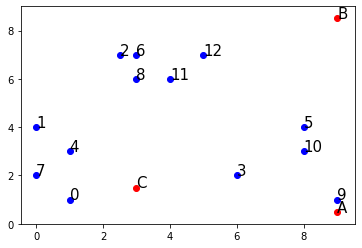

In [82]:
plt.scatter(points[:,0],points[:,1],color='blue')
plt.scatter(middles[:,0],middles[:,1],color='red')
for i in range(0,n): 
    plt.text(points[i][0], points[i][1], str(i), fontsize=15)
for i in range(0,k): 
    plt.text(middles[i,0],middles[i,1], chr(i+65), fontsize=15)

In [83]:
nb = 5 
for i in range(nb):
    old_middles = middles
    belongs = calc_euclid_distances(points,middles)
    middles = calc_new_middles(points,middles,belongs)
    #print(middles)                                           
    print(np.sum(old_middles-middles))

1.9999999999999991
4.675000000000001
1.4750000000000005
0.0
0.0


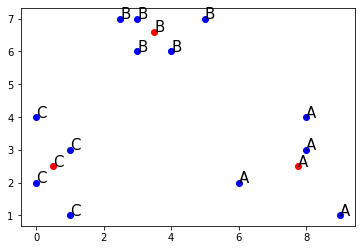

In [84]:
scatter_plot(points,middles,belongs)